In [12]:
import pandas as pd

# CSV dosyasını okuyalım
df = pd.read_csv("otel_temizlik_veriseti_2025-03-25_14-04-23.csv")

# Veri setinin ilk birkaç satırını ve sütun başlıklarını görüntüleyelim
df.head()

,Tarih,Oda Numarası,Oda Tipi,Personel ID,Temizlik Türü,Giriş Saati,Çıkış Saati
0,2024-01-01,165,Standart,P005,Rutin,08:48,08:56
1,2024-01-01,165,Standart,M002,Mini Bar,11:08,11:12
2,2024-01-01,108,Standart,P004,Rutin,08:14,08:23
3,2024-01-01,108,Standart,M002,Mini Bar,11:53,11:59
4,2024-01-01,131,Standart,P002,Rutin,08:42,08:56


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309107 entries, 0 to 309106
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Tarih          309107 non-null  object
 1   Oda Numarası   309107 non-null  int64 
 2   Oda Tipi       309107 non-null  object
 3   Personel ID    309107 non-null  object
 4   Temizlik Türü  309107 non-null  object
 5   Giriş Saati    309107 non-null  object
 6   Çıkış Saati    309107 non-null  object
dtypes: int64(1), object(6)
memory usage: 16.5+ MB


In [16]:
df['Tarih'] = pd.to_datetime(df['Tarih'])

df['Giriş Saati'] = pd.to_datetime(df['Giriş Saati'], format='%H:%M').dt.time
df['Çıkış Saati'] = pd.to_datetime(df['Çıkış Saati'], format='%H:%M').dt.time

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309107 entries, 0 to 309106
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Tarih          309107 non-null  datetime64[ns]
 1   Oda Numarası   309107 non-null  int64         
 2   Oda Tipi       309107 non-null  object        
 3   Personel ID    309107 non-null  object        
 4   Temizlik Türü  309107 non-null  object        
 5   Giriş Saati    309107 non-null  object        
 6   Çıkış Saati    309107 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 16.5+ MB


In [18]:
df.head()

,Tarih,Oda Numarası,Oda Tipi,Personel ID,Temizlik Türü,Giriş Saati,Çıkış Saati
0,2024-01-01,165,Standart,P005,Rutin,08:48:00,08:56:00
1,2024-01-01,165,Standart,M002,Mini Bar,11:08:00,11:12:00
2,2024-01-01,108,Standart,P004,Rutin,08:14:00,08:23:00
3,2024-01-01,108,Standart,M002,Mini Bar,11:53:00,11:59:00
4,2024-01-01,131,Standart,P002,Rutin,08:42:00,08:56:00


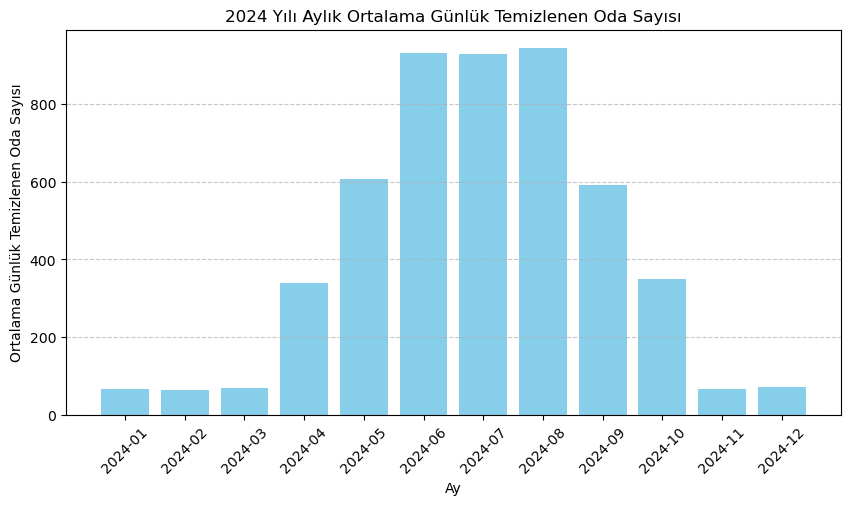

In [20]:
import matplotlib.pyplot as plt

gunluk_temizlenen_oda_sayisi = df.groupby('Tarih')['Oda Numarası'].nunique().reset_index()
gunluk_temizlenen_oda_sayisi.columns = ['Tarih', 'Günlük Temizlenen Oda Sayısı']
gunluk_temizlenen_oda_sayisi['Ay'] = pd.to_datetime(gunluk_temizlenen_oda_sayisi['Tarih']).dt.to_period('M')

aylik_ortalama_temizlik = (
    gunluk_temizlenen_oda_sayisi.groupby('Ay')['Günlük Temizlenen Oda Sayısı'].mean().reset_index()
)
aylik_ortalama_temizlik.columns = ['Ay', 'Ortalama Günlük Temizlenen Oda Sayısı']

# Grafiği oluşturma
plt.figure(figsize=(10, 5))
plt.bar(aylik_ortalama_temizlik["Ay"].astype(str), aylik_ortalama_temizlik["Ortalama Günlük Temizlenen Oda Sayısı"], color="skyblue")

# Grafik başlık ve etiketleri
plt.title("2024 Yılı Aylık Ortalama Günlük Temizlenen Oda Sayısı")
plt.xlabel("Ay")
plt.ylabel("Ortalama Günlük Temizlenen Oda Sayısı")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Grafiği gösterme
plt.show()


In [34]:
import pandas as pd

# Çalışanları sınıflandırma
df['Personel Tipi'] = df['Personel ID'].apply(lambda x: 'Arıza Personeli' if x.startswith('A') 
                                              else 'Temizlik Personeli' if x.startswith('P') 
                                              else 'Mini Bar Görevlisi' if x.startswith('M') 
                                              else 'Diğer')

# Her personel tipinin kaç farklı çalışanı olduğunu hesaplayalım
personel_sayilari = df.groupby('Personel Tipi')['Personel ID'].nunique().reset_index()
personel_sayilari.columns = ['Personel Tipi', 'Personel Sayısı']

# Tabloyu görüntüleyelim
personel_sayilari.head()

,Personel Tipi,Personel Sayısı
0,Arıza Personeli,10
1,Mini Bar Görevlisi,32
2,Temizlik Personeli,90


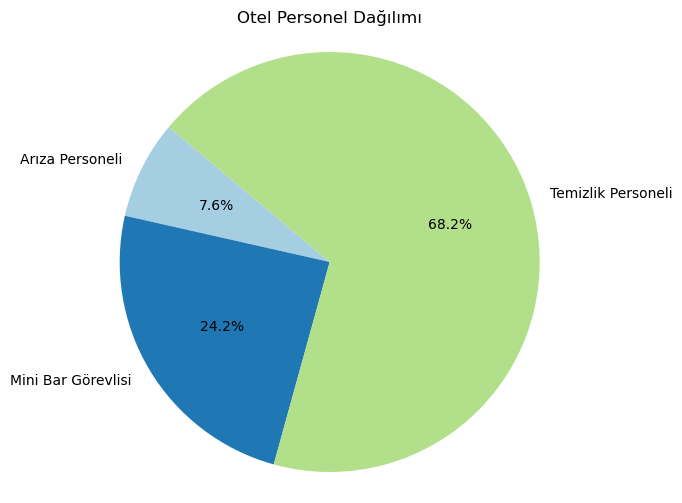

In [28]:
import matplotlib.pyplot as plt

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 6))
plt.pie(personel_sayilari["Personel Sayısı"],
        labels=personel_sayilari["Personel Tipi"],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors)

# Grafik başlığı
plt.title("Otel Personel Dağılımı")

# Daireyi eşit yapmak için
plt.axis('equal')

# Grafiği gösterme
plt.show()